# APE ANALYTICS
## Data analysis with python from scratch, lesson 7: Pandas 101

### 1. What is Pandas?

- 'Dataframe' object is great to store and manipulate data
- Great at cleaning data
- Time stuff
- Quick viz capabilities
- https://pandas.pydata.org/

### 2. Installing and importing Pandas

Just like Numpy, Pandas is already installed if you use Anaconda, woop woop! Importing it is not too hard either

In [152]:
import pandas as pd

Let's import Numpy too for good measure

In [153]:
import numpy as np

### 3. Building dataframes and series

In [154]:
pokemons = ['charizard', 'articuno', 'tauros']
health = [78, 90, 75]
attack = [84, 100, 90]
legendary_flag = [False, True, False]

In [155]:
my_data = {'name': pokemons
           , 'health_points': health
           , 'attack_points': attack
           , 'legendary': legendary_flag}

my_columns = my_data.keys()

In [156]:
df_pk = pd.DataFrame(data = my_data, columns = my_columns)
df_pk

,name,health_points,attack_points,legendary
0,charizard,78,84,False
1,articuno,90,100,True
2,tauros,75,90,False


In [157]:
type(df_pk)

pandas.core.frame.DataFrame

In [158]:
df_pk.index

RangeIndex(start=0, stop=3, step=1)

In [159]:
df_pk.set_index('name', inplace = True)
df_pk

,health_points,attack_points,legendary
name,,,
charizard,78,84,False
articuno,90,100,True
tauros,75,90,False


In [160]:
df_pk['legendary']

name
charizard    False
articuno      True
tauros       False
Name: legendary, dtype: bool

In [161]:
type(df_pk['legendary'])

pandas.core.series.Series

### 4. Loading data

European Centre for Disease Prevention and Control: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (accessed 06/04/2020)

Reading .csv files

In [162]:
file_name = 'COVID-19-geographic-disbtribution-worldwide-2020-04-09.csv'
df_c19 = pd.read_csv(file_name)

Reading .json files

In [163]:
file_name = 'clickstream.json'
df_clickstream = pd.read_json(file_name)

In [164]:
file_name = 'countries.json'
df_countries = pd.read_json(file_name)

And there are other ways to get data

### 5. Getting familiar with the data

In [165]:
df_c19.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
1,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
2,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
3,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
4,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0


In [166]:
df_clickstream.sample(3)

,cookie_id,visit_no,country_id,page_no,page_name,date
16,tab-stu,9,1.0,2,checkout,2020-04-06
14,tab-stu,8,1.0,1,product,2020-04-06
7,dtp-jkl,1,2.0,2,None,2020-04-06


In [167]:
df_c19.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2018                float64
dtype: object

In [168]:
df_c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9717 entries, 0 to 9716
Data columns (total 10 columns):
dateRep                    9717 non-null object
day                        9717 non-null int64
month                      9717 non-null int64
year                       9717 non-null int64
cases                      9717 non-null int64
deaths                     9717 non-null int64
countriesAndTerritories    9717 non-null object
geoId                      9691 non-null object
countryterritoryCode       9524 non-null object
popData2018                9569 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 759.3+ KB


In [169]:
df_c19['cases'].mean()

151.98301945044767

In [170]:
df_c19.describe()

,day,month,year,cases,deaths,popData2018
count,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9.569000e+03
mean,15.411341,2.621385,2019.993105,151.983019,9.037357,6.375818e+07
std,9.374690,1.287272,0.082754,1184.675208,74.966368,2.005423e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,7.000000,2.000000,2020.000000,0.000000,0.000000,3.449299e+06
50%,15.000000,3.000000,2020.000000,0.000000,0.000000,1.028176e+07
75%,24.000000,3.000000,2020.000000,14.000000,0.000000,4.222843e+07
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09


In [171]:
df_clickstream['cookie_id'].value_counts()

dtp-pqr    4
mob-abc    4
tab-stu    3
dtp-jkl    2
dtp-mno    2
dtp-def    1
dtp-ghi    1
Name: cookie_id, dtype: int64

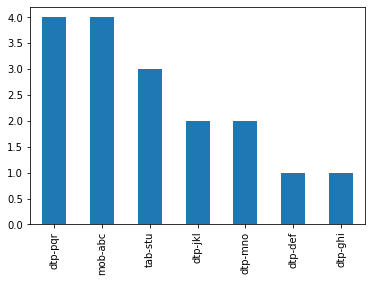

In [172]:
df_clickstream['cookie_id'].value_counts().plot.bar()

### 6. Indexing and filtering

In [173]:
df_pk.iloc[0]

health_points       78
attack_points       84
legendary        False
Name: charizard, dtype: object

In [174]:
df_pk.iloc[1, 1:3]

attack_points     100
legendary        True
Name: articuno, dtype: object

In [175]:
df_pk.loc['tauros', ['legendary']]

legendary    False
Name: tauros, dtype: object

In [176]:
df_clickstream['page_name'] == 'confirmation'

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
Name: page_name, dtype: bool

In [177]:
df_clickstream[df_clickstream['page_name'] == 'confirmation']

,cookie_id,visit_no,country_id,page_no,page_name,date
3,mob-abc,4,1.0,4,confirmation,2020-04-06
12,dtp-pqr,2,2.0,3,confirmation,2020-04-06


In [178]:
df_c19[(df_c19['popData2018'] < 10**8) & (df_c19['popData2018'] > 10**7)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
1,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
2,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
3,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
4,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9712,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9713,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9714,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9715,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


### 7. Data cleaning

Drop column

In [179]:
df_c19.drop(inplace = True, columns = ['geoId'])
df_c19.sample(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2018
6950,26/03/2020,26,3,2020,66,1,Pakistan,PAK,2.122150e+08
3171,15/01/2020,15,1,2020,0,0,Finland,FIN,5.518050e+06
8539,05/04/2020,5,4,2020,0,0,Suriname,SUR,5.759910e+05
4112,18/03/2020,18,3,2020,12,0,India,IND,1.352617e+09
7164,20/03/2020,20,3,2020,89,2,Peru,PER,3.198926e+07


In [180]:
no_need = ['day', 'month', 'year', 'countriesAndTerritories']
df_c19.drop(inplace = True, columns = no_need)
df_c19.sample(5)

,dateRep,cases,deaths,countryterritoryCode,popData2018
6389,04/01/2020,0,0,NLD,17231017.0
2518,24/03/2020,2,0,DJI,958920.0
6512,03/04/2020,0,0,NIC,6465513.0
4022,07/03/2020,8,0,ISL,353574.0
1882,07/03/2020,1,0,CHL,18729160.0


Create new column

In [181]:
df_clickstream['purch_flag'] = np.where(df_clickstream['page_name'] == 'confirmation', 1, 0)
df_clickstream

,cookie_id,visit_no,country_id,page_no,page_name,date,purch_flag
0,mob-abc,4,1.0,1,homepage,2020-04-06,0
1,mob-abc,4,1.0,2,product,2020-04-06,0
2,mob-abc,4,1.0,3,checkout,2020-04-06,0
3,mob-abc,4,1.0,4,confirmation,2020-04-06,1
4,dtp-def,1,2.0,1,product,2020-04-06,0
5,dtp-ghi,2,2.0,1,product,2020-04-06,0
6,dtp-jkl,1,2.0,1,product,2020-04-06,0
7,dtp-jkl,1,2.0,2,None,2020-04-06,0
8,dtp-mno,6,3.0,1,product,2020-04-06,0
9,dtp-mno,7,3.0,1,product,2020-04-06,0


Split column

In [182]:
df_clickstream['cookie_id']

0     mob-abc
1     mob-abc
2     mob-abc
3     mob-abc
4     dtp-def
5     dtp-ghi
6     dtp-jkl
7     dtp-jkl
8     dtp-mno
9     dtp-mno
10    dtp-pqr
11    dtp-pqr
12    dtp-pqr
13    dtp-pqr
14    tab-stu
15    tab-stu
16    tab-stu
Name: cookie_id, dtype: object

In [183]:
df_clickstream['cookie'] = df_clickstream['cookie_id'].str.split('-', expand = True)[1]
df_clickstream['device'] = df_clickstream['cookie_id'].str.split('-', expand = True)[0]
df_clickstream.drop(inplace = True, columns = ['cookie_id'])
df_clickstream.sample(5)

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
16,9,1.0,2,checkout,2020-04-06,0,stu,tab
3,4,1.0,4,confirmation,2020-04-06,1,abc,mob
1,4,1.0,2,product,2020-04-06,0,abc,mob
9,7,3.0,1,product,2020-04-06,0,mno,dtp
7,1,2.0,2,None,2020-04-06,0,jkl,dtp


Rename column

In [184]:
rename_dict = {'dateRep': 'date'
               , 'countryterritoryCode': 'country_name'
               , 'popData2018': 'country_pop'}
df_c19.rename(columns = rename_dict, inplace = True)
df_c19.sample(5)

,date,cases,deaths,country_name,country_pop
7149,04/04/2020,181,6,PER,31989256.0
7215,27/02/2020,0,0,PHL,106651922.0
2761,09/03/2020,34,1,EGY,98423595.0
4885,14/02/2020,1,0,JPN,126529100.0
1648,19/02/2020,0,0,CAN,37058856.0


Change column

In [185]:
df_clickstream['cookie'] = df_clickstream['cookie'].str.upper()
df_clickstream.sample(5)

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
7,1,2.0,2,None,2020-04-06,0,JKL,dtp
9,7,3.0,1,product,2020-04-06,0,MNO,dtp
6,1,2.0,1,product,2020-04-06,0,JKL,dtp
11,2,NaN,2,checkout,2020-04-06,0,PQR,dtp
0,4,1.0,1,homepage,2020-04-06,0,ABC,mob


In [186]:
device_dict = {'dtp': 'desktop'
               , 'mob': 'mobile'
               , 'tab': 'tablet'}
df_clickstream['device'] = df_clickstream['device'].map(device_dict)
df_clickstream.sample(5)

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
3,4,1.0,4,confirmation,2020-04-06,1,ABC,mobile
16,9,1.0,2,checkout,2020-04-06,0,STU,tablet
6,1,2.0,1,product,2020-04-06,0,JKL,desktop
10,2,2.0,1,product,2020-04-06,0,PQR,desktop
0,4,1.0,1,homepage,2020-04-06,0,ABC,mobile


Dealing with nulls

In [187]:
df_clickstream.isna().sum()

visit_no      0
country_id    1
page_no       0
page_name     1
date          0
purch_flag    0
cookie        0
device        0
dtype: int64

In [188]:
df_clickstream[df_clickstream['country_id'].isna()]

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
11,2,NaN,2,checkout,2020-04-06,0,PQR,desktop


In [189]:
df_clickstream[df_clickstream['cookie'] == 'PQR']

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
10,2,2.0,1,product,2020-04-06,0,PQR,desktop
11,2,NaN,2,checkout,2020-04-06,0,PQR,desktop
12,2,2.0,3,confirmation,2020-04-06,1,PQR,desktop
13,3,2.0,1,homepage,2020-04-06,0,PQR,desktop


In [190]:
df_clickstream['country_id'].fillna(2, inplace = True)
df_clickstream[df_clickstream['cookie'] == 'PQR']

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
10,2,2.0,1,product,2020-04-06,0,PQR,desktop
11,2,2.0,2,checkout,2020-04-06,0,PQR,desktop
12,2,2.0,3,confirmation,2020-04-06,1,PQR,desktop
13,3,2.0,1,homepage,2020-04-06,0,PQR,desktop


In [191]:
df_clickstream[df_clickstream['page_name'].isna()]

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
7,1,2.0,2,None,2020-04-06,0,JKL,desktop


In [192]:
df_clickstream.dropna(subset = ['page_name'], inplace = True)
df_clickstream

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
0,4,1.0,1,homepage,2020-04-06,0,ABC,mobile
1,4,1.0,2,product,2020-04-06,0,ABC,mobile
2,4,1.0,3,checkout,2020-04-06,0,ABC,mobile
3,4,1.0,4,confirmation,2020-04-06,1,ABC,mobile
4,1,2.0,1,product,2020-04-06,0,DEF,desktop
5,2,2.0,1,product,2020-04-06,0,GHI,desktop
6,1,2.0,1,product,2020-04-06,0,JKL,desktop
8,6,3.0,1,product,2020-04-06,0,MNO,desktop
9,7,3.0,1,product,2020-04-06,0,MNO,desktop
10,2,2.0,1,product,2020-04-06,0,PQR,desktop


Change data type of column

In [193]:
df_clickstream.dtypes

visit_no               int64
country_id           float64
page_no                int64
page_name             object
date          datetime64[ns]
purch_flag             int32
cookie                object
device                object
dtype: object

In [194]:
df_clickstream['purch_flag'] = df_clickstream['purch_flag'].astype('bool')
df_clickstream

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device
0,4,1.0,1,homepage,2020-04-06,False,ABC,mobile
1,4,1.0,2,product,2020-04-06,False,ABC,mobile
2,4,1.0,3,checkout,2020-04-06,False,ABC,mobile
3,4,1.0,4,confirmation,2020-04-06,True,ABC,mobile
4,1,2.0,1,product,2020-04-06,False,DEF,desktop
5,2,2.0,1,product,2020-04-06,False,GHI,desktop
6,1,2.0,1,product,2020-04-06,False,JKL,desktop
8,6,3.0,1,product,2020-04-06,False,MNO,desktop
9,7,3.0,1,product,2020-04-06,False,MNO,desktop
10,2,2.0,1,product,2020-04-06,False,PQR,desktop


### 8. SQL like operations

Grouping

In [195]:
df_c19

,date,cases,deaths,country_name,country_pop
0,09/04/2020,56,3,AFG,37172386.0
1,08/04/2020,30,4,AFG,37172386.0
2,07/04/2020,38,0,AFG,37172386.0
3,06/04/2020,29,2,AFG,37172386.0
4,05/04/2020,35,1,AFG,37172386.0
...,...,...,...,...,...
9712,25/03/2020,0,0,ZWE,14439018.0
9713,24/03/2020,0,1,ZWE,14439018.0
9714,23/03/2020,0,0,ZWE,14439018.0
9715,22/03/2020,1,0,ZWE,14439018.0


In [196]:
df_grp = df_c19.groupby(['country_name', 'country_pop'], as_index = False).agg({'cases': np.sum, 'deaths': np.sum})
df_grp.set_index('country_name', inplace = True)
df_grp['case_p1000'] = 1000 * df_grp['cases'] / df_grp['country_pop']
df_grp.sample(10)

,country_pop,cases,deaths,case_p1000
country_name,,,,
CUW,159849.0,14,1,0.087583
RUS,144478050.0,8672,63,0.060023
PAN,4176873.0,2528,63,0.605237
MNG,3170208.0,16,0,0.005047
AND,77006.0,564,23,7.324105
SXM,41486.0,40,8,0.964181
IDN,267663435.0,2956,240,0.011044
BGR,7024216.0,593,24,0.084422
EST,1320884.0,1185,24,0.897126


Sorting

In [197]:
df_grp = df_grp.sort_values(['cases'], ascending = False)
df_grp.head(10)

,country_pop,cases,deaths,case_p1000
country_name,,,,
USA,3.271674e+08,432132,14817,1.320828
ESP,4.672375e+07,146690,14555,3.139517
ITA,6.043128e+07,139422,17669,2.307116
DEU,8.292792e+07,108202,2107,1.304772
CHN,1.392730e+09,82870,3339,0.059502
FRA,6.698724e+07,82048,10869,1.224830
IRN,8.180027e+07,64586,3993,0.789557
GBR,6.648899e+07,60733,7097,0.913429
TUR,8.231972e+07,38226,812,0.464360


In [198]:
df_grp.sort_values(['case_p1000'], ascending = False)

,country_pop,cases,deaths,case_p1000
country_name,,,,
SMR,33785.0,308,34,9.116472
VAT,1000.0,8,0,8.000000
AND,77006.0,564,23,7.324105
LUX,607728.0,3034,46,4.992365
ISL,353574.0,1616,6,4.570472
...,...,...,...,...
SDN,41801533.0,14,2,0.000335
NPL,28087871.0,9,0,0.000320
BDI,11175378.0,3,0,0.000268


Joining

In [199]:
df_clickstream = pd.merge(df_clickstream, df_countries, left_on = 'country_id', right_on = 'country_id', how = 'left')
df_clickstream

,visit_no,country_id,page_no,page_name,date,purch_flag,cookie,device,country_name
0,4,1.0,1,homepage,2020-04-06,False,ABC,mobile,UK
1,4,1.0,2,product,2020-04-06,False,ABC,mobile,UK
2,4,1.0,3,checkout,2020-04-06,False,ABC,mobile,UK
3,4,1.0,4,confirmation,2020-04-06,True,ABC,mobile,UK
4,1,2.0,1,product,2020-04-06,False,DEF,desktop,France
5,2,2.0,1,product,2020-04-06,False,GHI,desktop,France
6,1,2.0,1,product,2020-04-06,False,JKL,desktop,France
7,6,3.0,1,product,2020-04-06,False,MNO,desktop,Sweden
8,7,3.0,1,product,2020-04-06,False,MNO,desktop,Sweden
9,2,2.0,1,product,2020-04-06,False,PQR,desktop,France


Deduping, e.g. to calculate visit conversion from our clickstream data (# purchases / # visits)

In [200]:
df_clickstream[['cookie', 'visit_no']].drop_duplicates()

,cookie,visit_no
0,ABC,4
4,DEF,1
5,GHI,2
6,JKL,1
7,MNO,6
8,MNO,7
9,PQR,2
12,PQR,3
13,STU,8
14,STU,9


In [201]:
purch_count = df_clickstream['purch_flag'].sum() 
vis_count = len(df_clickstream[['cookie', 'visit_no']].drop_duplicates())
cvr = purch_count / vis_count
vis_count, purch_count, str(100 * cvr) + '%'

(10, 2, '20.0%')

### 9. Pivoting and melting

In [202]:
df_ex = df_grp.copy()
df_ex.reset_index(inplace = True)
df_ex

,country_name,country_pop,cases,deaths,case_p1000
0,USA,3.271674e+08,432132,14817,1.320828
1,ESP,4.672375e+07,146690,14555,3.139517
2,ITA,6.043128e+07,139422,17669,2.307116
3,DEU,8.292792e+07,108202,2107,1.304772
4,CHN,1.392730e+09,82870,3339,0.059502
...,...,...,...,...,...
194,VGB,2.980200e+04,3,0,0.100664
195,BDI,1.117538e+07,3,0,0.000268
196,PNG,8.606316e+06,2,0,0.000232
197,SSD,1.097592e+07,2,0,0.000182


Melting to go from wide to long

In [203]:
values = ['country_pop', 'cases', 'deaths', 'case_p1000']
df_melt = df_ex.melt(id_vars = ['country_name'], value_vars = values)
df_melt

,country_name,variable,value
0,USA,country_pop,3.271674e+08
1,ESP,country_pop,4.672375e+07
2,ITA,country_pop,6.043128e+07
3,DEU,country_pop,8.292792e+07
4,CHN,country_pop,1.392730e+09
...,...,...,...
791,VGB,case_p1000,1.006644e-01
792,BDI,case_p1000,2.684473e-04
793,PNG,case_p1000,2.323875e-04
794,SSD,case_p1000,1.822171e-04


Pivotting to go from long to wide

In [204]:
df_pivot = df_melt.pivot(index = 'country_name', columns = 'variable', values = 'value')
df_pivot

variable,case_p1000,cases,country_pop,deaths
country_name,,,,
ABW,0.727479,77.0,105845.0,0.0
AFG,0.011379,423.0,37172386.0,14.0
AGO,0.000617,19.0,30809762.0,2.0
ALB,0.139549,400.0,2866376.0,22.0
AND,7.324105,564.0,77006.0,23.0
...,...,...,...,...
VNM,0.002627,251.0,95540395.0,0.0
XKX,0.099713,184.0,1845300.0,5.0
ZAF,0.031932,1845.0,57779622.0,18.0


### 10. Time operations and time series

Converting strings to timestamps

In [205]:
pd.to_datetime('2020-02-23')

Timestamp('2020-02-23 00:00:00')

In [206]:
pd.to_datetime('23rd of February 2020')

Timestamp('2020-02-23 00:00:00')

Extracting elements from datestamps

In [207]:
pd.to_datetime('2020-02-23').strftime('%Y')

'2020'

In [208]:
pd.to_datetime('2020-02-23').strftime('%A')

'Sunday'

Adding time periods to timestamps

In [209]:
pd.to_datetime('23 Feb 2020') + pd.to_timedelta(5, 'D')

Timestamp('2020-02-28 00:00:00')

Let's go back to our df_c19 dataframe for some time series fun

In [210]:
df_c19.dtypes

date             object
cases             int64
deaths            int64
country_name     object
country_pop     float64
dtype: object

In [221]:
df_c19['date'] = pd.to_datetime(df_c19['date'], format = '%d/%m/%Y')
df_c19.sample(5)

,date,cases,deaths,country_name,country_pop
2668,2020-03-01,1,0,ECU,17084357.0
6405,2020-03-29,0,0,NCL,284060.0
7937,2020-04-06,0,0,SYC,96762.0
1775,2020-01-07,0,0,NaN,3000.0
3411,2020-02-15,0,0,GEO,3731000.0


In [222]:
df_c19.dtypes

date            datetime64[ns]
cases                    int64
deaths                   int64
country_name            object
country_pop            float64
dtype: object

Date intervals

In [224]:
(df_c19['date'].max() - df_c19['date'].min()).days + 1

101

Time series

In [225]:
df_grp[0:5].index

Index(['USA', 'ESP', 'ITA', 'DEU', 'CHN'], dtype='object', name='country_name')

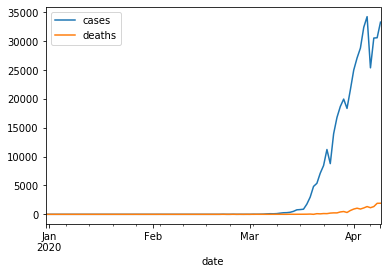

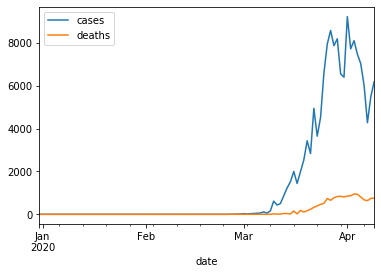

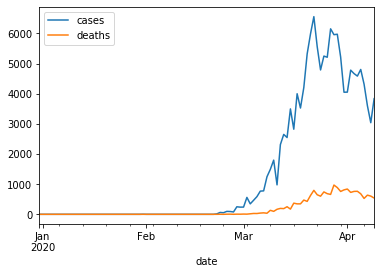

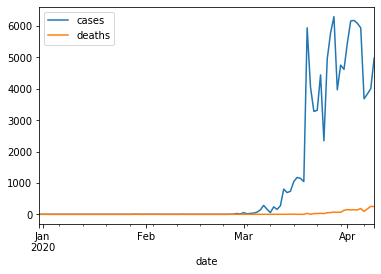

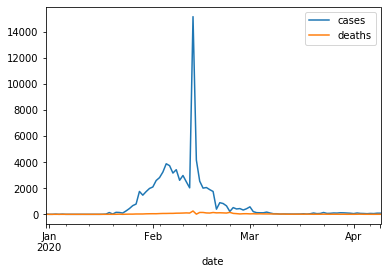

In [239]:
for country in df_grp[0:5].index:
    df_country = df_c19[df_c19['country_name'] == country]
    df_country.groupby(['date'], as_index = True).agg({'cases': np.sum, 'deaths': np.sum}).plot()

In [240]:
df_time = df_c19.groupby(['date'], as_index = True).agg({'cases': np.sum, 'deaths': np.sum})

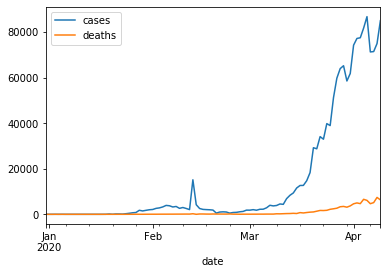

In [241]:
df_time.plot()

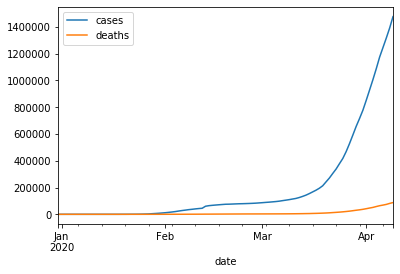

In [242]:
df_time.cumsum().plot()

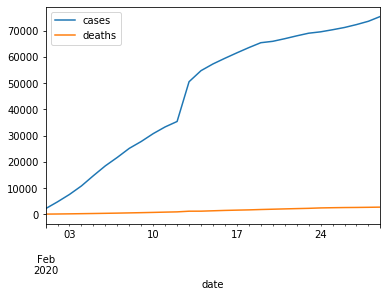

In [243]:
df_time['2020-02-01':'2020-02-29'].cumsum().plot()

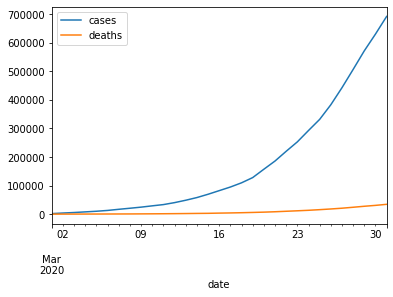

In [244]:
df_time['2020-03-01':'2020-03-31'].cumsum().plot()

### 11. If you want to become a pandas guru...

... check this out: https://github.com/ajcr/100-pandas-puzzles

... or that: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

... and if you want to play with real data: https://www.kaggle.com/datasets